#  1. IMPORTING LIBRARIES

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 2. DATA LOADING

In [28]:
df=pd.read_excel("C:/Users/samar/Downloads/OLA_DataSet.xlsx")
df

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103019,2024-07-31 09:06:00,09:06:00,CNR9488489435,Success,CID371654,Prime Plus,Richmond Town,Varthur,245.0,35.0,NaN,NaN,No,NaN,111,Cash,41,3.6,3.8,https://cdn-icons-png.flaticon.com/128/11409/1...
103020,2024-07-31 15:12:00,15:12:00,CNR3151743100,Success,CID334158,Auto,Vijayanagar,Richmond Town,84.0,145.0,NaN,NaN,No,NaN,1097,UPI,17,4.3,3.3,https://cdn-icons-png.flaticon.com/128/16526/1...
103021,2024-07-31 13:59:00,13:59:00,CNR1286151233,Success,CID113188,Prime SUV,Bannerghatta Road,JP Nagar,35.0,75.0,NaN,NaN,No,NaN,2201,Cash,37,3.6,3.2,https://cdn-icons-png.flaticon.com/128/9983/99...
103022,2024-07-31 14:56:00,14:56:00,CNR2027162035,Success,CID118301,eBike,Indiranagar,Magadi Road,210.0,140.0,NaN,NaN,No,NaN,267,UPI,47,3.4,3.1,https://cdn-icons-png.flaticon.com/128/6839/68...


# 3. DATA CLEANING

In [29]:
df.isnull().sum()

Date                              0
Time                              0
Booking_ID                        0
Booking_Status                    0
Customer_ID                       0
Vehicle_Type                      0
Pickup_Location                   0
Drop_Location                     0
V_TAT                         39057
C_TAT                         39057
Canceled_Rides_by_Customer    92525
Canceled_Rides_by_Driver      84590
Incomplete_Rides              39057
Incomplete_Rides_Reason       99098
Booking_Value                     0
Payment_Method                39057
Ride_Distance                     0
Driver_Ratings                39057
Customer_Rating               39057
Vehicle Images                    0
dtype: int64

In [30]:
# Status-wise summary of C_TAT and V_TAT
print("Summary by Ride Status:")
print(df.groupby('Booking_Status')[['C_TAT','V_TAT']].describe())

# Count of missing values by Status
print("\nMissing values by Booking_Status:")
print(df.groupby('Booking_Status')[['C_TAT','V_TAT']].apply(lambda x: x.isnull().sum()))


Summary by Ride Status:
                        C_TAT                                               \
                        count       mean      std   min   25%   50%    75%   
Booking_Status                                                               
Canceled by Customer      0.0        NaN      NaN   NaN   NaN   NaN    NaN   
Canceled by Driver        0.0        NaN      NaN   NaN   NaN   NaN    NaN   
Driver Not Found          0.0        NaN      NaN   NaN   NaN   NaN    NaN   
Success               63967.0  84.873372  36.0051  25.0  55.0  85.0  115.0   

                               V_TAT                                           \
                        max    count        mean       std   min   25%    50%   
Booking_Status                                                                  
Canceled by Customer    NaN      0.0         NaN       NaN   NaN   NaN    NaN   
Canceled by Driver      NaN      0.0         NaN       NaN   NaN   NaN    NaN   
Driver Not Found        

In [31]:
# Cancelled / Driver Not Found wali rides me missing ko 0 se fill karo
df.loc[df['Booking_Status']!='Success', ['C_TAT','V_TAT']] = df.loc[df['Booking_Status']!='Success', ['C_TAT','V_TAT']].fillna(0)
print(df.groupby('Booking_Status')[['C_TAT','V_TAT']].apply(lambda x: x.isnull().sum()))



                      C_TAT  V_TAT
Booking_Status                    
Canceled by Customer      0      0
Canceled by Driver        0      0
Driver Not Found          0      0
Success                   0      0


In [32]:
df['Canceled_Rides_by_Customer'] = df['Canceled_Rides_by_Customer'].fillna(0)
df['Canceled_Rides_by_Driver']   = df['Canceled_Rides_by_Driver'].fillna(0)
print(df[['Canceled_Rides_by_Customer','Canceled_Rides_by_Driver']].isnull().sum())



Canceled_Rides_by_Customer    0
Canceled_Rides_by_Driver      0
dtype: int64


In [33]:
# Convert to numeric
df['Incomplete_Rides'] = pd.to_numeric(df['Incomplete_Rides'], errors='coerce')

# Fill missing as 0
df['Incomplete_Rides'] = df['Incomplete_Rides'].fillna(0)


In [34]:
df.loc[(df['Incomplete_Rides']==0) & (df['Incomplete_Rides_Reason'].isnull()), 'Incomplete_Rides_Reason'] = 'Not Applicable'
df.loc[(df['Incomplete_Rides']>0) & (df['Incomplete_Rides_Reason'].isnull()), 'Incomplete_Rides_Reason'] = 'Unknown'


In [35]:
df['Driver_Ratings']   = df['Driver_Ratings'].fillna("Not Rated")
df['Customer_Rating']  = df['Customer_Rating'].fillna("Not Rated")


In [36]:
# Case 1: Ride not successful -> Payment Not Done
df.loc[(df['Booking_Status']!='Success') & (df['Payment_Method'].isnull()), 'Payment_Method'] = 'Payment Not Done'

# Case 2: Ride success but payment missing -> Unknown
df.loc[(df['Booking_Status']=='Success') & (df['Payment_Method'].isnull()), 'Payment_Method'] = 'Unknown'


# 4. DESCRIPTIVE STATISTICS

In [37]:
df[['V_TAT','C_TAT','Canceled_Rides_by_Customer','Canceled_Rides_by_Driver','Incomplete_Rides','Booking_Value','Ride_Distance','Driver_Ratings','Customer_Rating']].describe()

,V_TAT,C_TAT,Incomplete_Rides,Booking_Value,Ride_Distance
count,103024.000000,103024.000000,103024.0,103024.000000,103024.000000
mean,106.096502,52.697381,0.0,548.751883,14.189927
std,104.532203,50.005090,0.0,536.541221,15.776270
min,0.000000,0.000000,0.0,100.000000,0.000000
25%,0.000000,0.000000,0.0,242.000000,0.000000
50%,84.000000,45.000000,0.0,386.000000,8.000000
75%,196.000000,95.000000,0.0,621.000000,26.000000
max,308.000000,145.000000,0.0,2999.000000,49.000000


In [38]:
print(df['Date'].value_counts())
print(df['Time'].value_counts())
print(df['Booking_ID'].value_counts())
print(df['Booking_Status'].value_counts())
print(df['Customer_ID'].value_counts())
print(df['Vehicle_Type'].value_counts())
print(df['Pickup_Location'].value_counts())
print(df['Drop_Location'].value_counts())
print(df['Incomplete_Rides_Reason'].value_counts())
print(df['Payment_Method'].value_counts())

Date
2024-07-13 18:53:00    10
2024-07-10 14:03:00    10
2024-07-01 20:09:00    10
2024-07-05 11:58:00    10
2024-07-19 19:22:00    10
                       ..
2024-07-13 11:24:00     1
2024-07-20 06:46:00     1
2024-07-26 09:03:00     1
2024-07-28 15:31:00     1
2024-07-31 09:19:00     1
Name: count, Length: 40214, dtype: int64
Time
00:53:00    101
22:12:00     97
01:13:00     96
18:20:00     95
08:31:00     95
           ... 
01:00:00     50
23:28:00     49
00:02:00     48
04:39:00     48
02:22:00     42
Name: count, Length: 1440, dtype: int64
Booking_ID
CNR7153255142    1
CNR3132290107    1
CNR8932160336    1
CNR9179360017    1
CNR5601846474    1
                ..
CNR7587717418    1
CNR1238312945    1
CNR6917109437    1
CNR1410343839    1
CNR9770709721    1
Name: count, Length: 103024, dtype: int64
Booking_Status
Success                 63967
Canceled by Driver      18434
Canceled by Customer    10499
Driver Not Found        10124
Name: count, dtype: int64
Customer_ID
CID954071   

# 5. EXPLORATORY DATA ANALYSIS


  # UNIVARIATE ANALYSIS OF EACH COLUMN

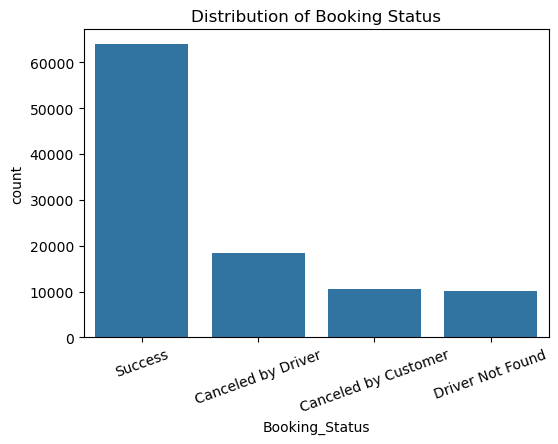

In [39]:


plt.figure(figsize=(6,4))
sns.countplot(x='Booking_Status', data=df, order=df['Booking_Status'].value_counts().index)
plt.title("Distribution of Booking Status")
plt.xticks(rotation=20)
plt.show()


Most of the rides are successful, but driver cancellations are quite high, which is a major concern. Customer cancellations and driver not found cases are comparatively lower.

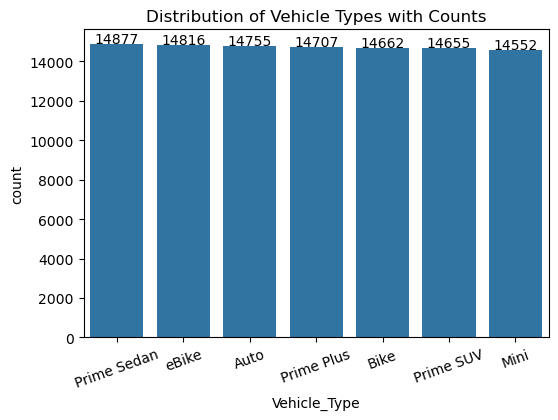

In [40]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Vehicle_Type', data=df, order=df['Vehicle_Type'].value_counts().index)

# Add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 50,   # +50 = thoda upar space
            f'{int(height)}', ha='center')

plt.title("Distribution of Vehicle Types with Counts")
plt.xticks(rotation=20)
plt.show()


All vehicle types have almost equal bookings, which indicates customers are using Ola services across different categories without a strong preference for any single type.

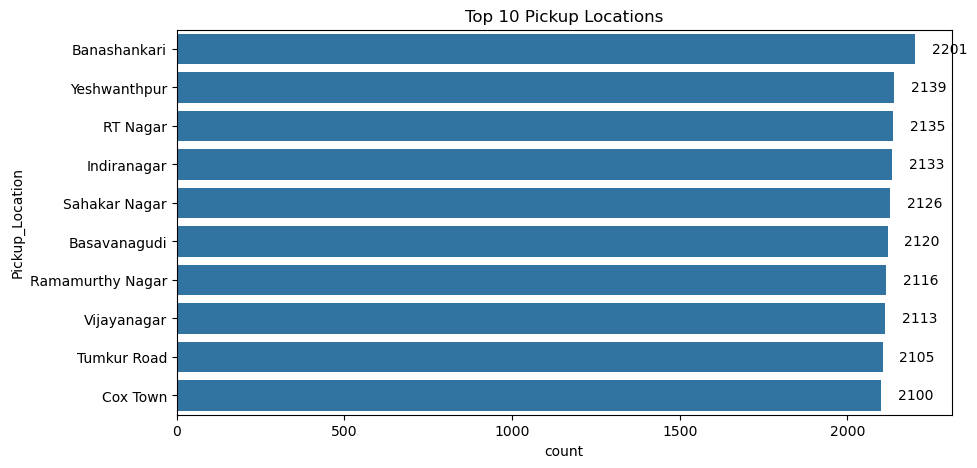

In [41]:
plt.figure(figsize=(10,5))
ax = sns.countplot(
    y='Pickup_Location', 
    data=df, 
    order=df['Pickup_Location'].value_counts().head(10).index
)

# Add labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width+50, p.get_y() + p.get_height()/2, f'{int(width)}', va='center')

plt.title("Top 10 Pickup Locations")
plt.show()


Most bookings are concentrated in a few major pickup locations, with Banashankari being the most popular starting point. This indicates it is a high-demand zone where Ola services are frequently used.

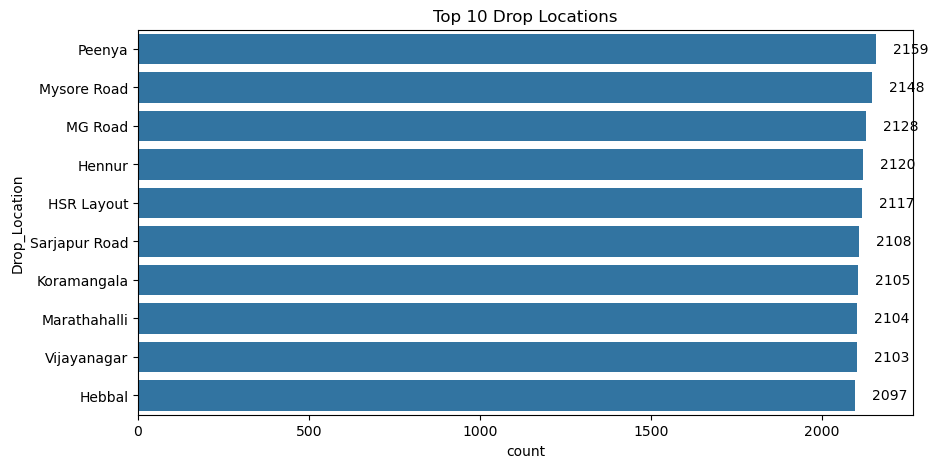

In [42]:
plt.figure(figsize=(10,5))
ax = sns.countplot(
    y='Drop_Location', 
    data=df, 
    order=df['Drop_Location'].value_counts().head(10).index
)

# Add data labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width+50, p.get_y() + p.get_height()/2, f'{int(width)}', va='center')

plt.title("Top 10 Drop Locations")
plt.show()


Most drop-offs are concentrated in a few key locations, with Peenya being the highest drop point. This indicates Peenya is a major destination hub for Ola rides

In [43]:
# counts
total_v0 = (df['V_TAT'] == 0).sum()
total_c0 = (df['C_TAT'] == 0).sum()
print("Total zeros — V_TAT:", total_v0, " C_TAT:", total_c0)

# zeros inside Success rides (should normally be 0 if cleaning was correct)
success = df[df['Booking_Status'] == 'Success']
print("Zeros in Success — V_TAT:", (success['V_TAT'] == 0).sum(),
      " C_TAT:", (success['C_TAT'] == 0).sum())

# zeros in non-success
not_success = df[df['Booking_Status'] != 'Success']
print("Zeros in Non-Success — V_TAT:", (not_success['V_TAT'] == 0).sum(),
      " C_TAT:", (not_success['C_TAT'] == 0).sum())


Total zeros — V_TAT: 39057  C_TAT: 39057
Zeros in Success — V_TAT: 0  C_TAT: 0
Zeros in Non-Success — V_TAT: 39057  C_TAT: 39057


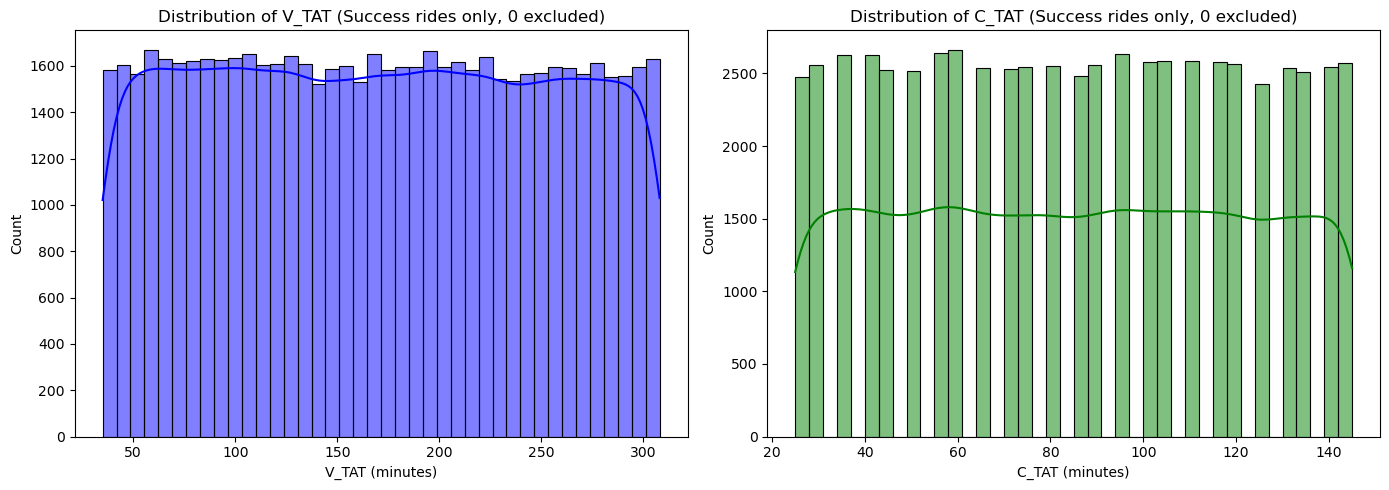

In [44]:
success = df[df['Booking_Status'] == 'Success']

# Exclude zeros
vtat_nonzero = success.loc[success['V_TAT'] > 0, 'V_TAT']
ctat_nonzero = success.loc[success['C_TAT'] > 0, 'C_TAT']

# Plot side by side
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(vtat_nonzero, bins=40, kde=True, color='blue')
plt.title("Distribution of V_TAT (Success rides only, 0 excluded)")
plt.xlabel("V_TAT (minutes)")
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.histplot(ctat_nonzero, bins=40, kde=True, color='green')
plt.title("Distribution of C_TAT (Success rides only, 0 excluded)")
plt.xlabel("C_TAT (minutes)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

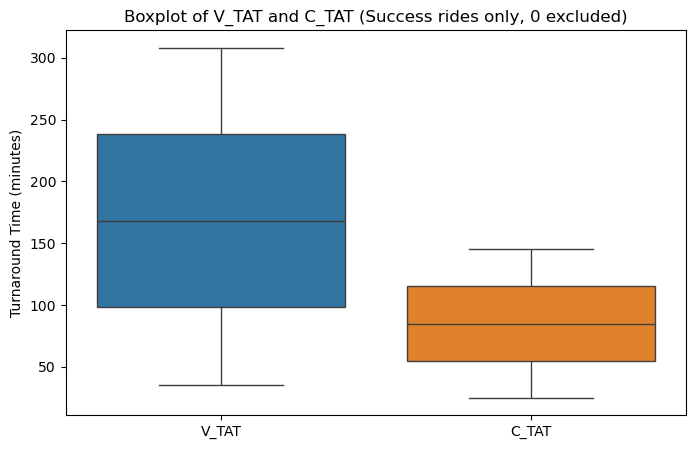

In [45]:

# Success only, excluding zeros
success = df[df['Booking_Status'] == 'Success']
vtat_nonzero = success.loc[success['V_TAT'] > 0, 'V_TAT']
ctat_nonzero = success.loc[success['C_TAT'] > 0, 'C_TAT']

# Combine into one DataFrame for boxplot
tat_data = success[['V_TAT','C_TAT']].copy()
tat_data = tat_data[(tat_data['V_TAT'] > 0) & (tat_data['C_TAT'] > 0)]

# Plot boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=tat_data)
plt.title("Boxplot of V_TAT and C_TAT (Success rides only, 0 excluded)")
plt.ylabel("Turnaround Time (minutes)")
plt.show()


The analysis of V_TAT and C_TAT shows no significant outliers, as most rides fall within a consistent range. The distribution is almost identical for both, which suggests that the waiting times reported by the customer and driver are aligned without major anomalies

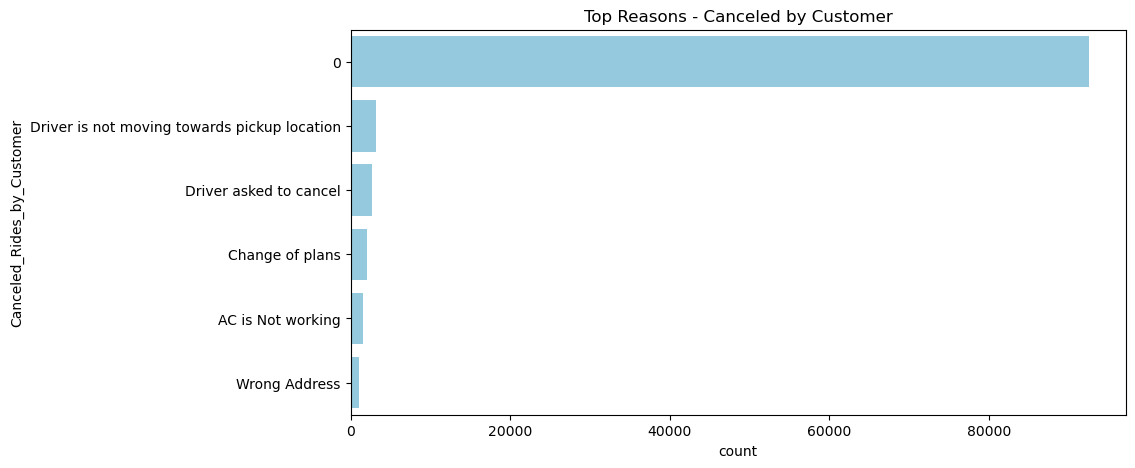

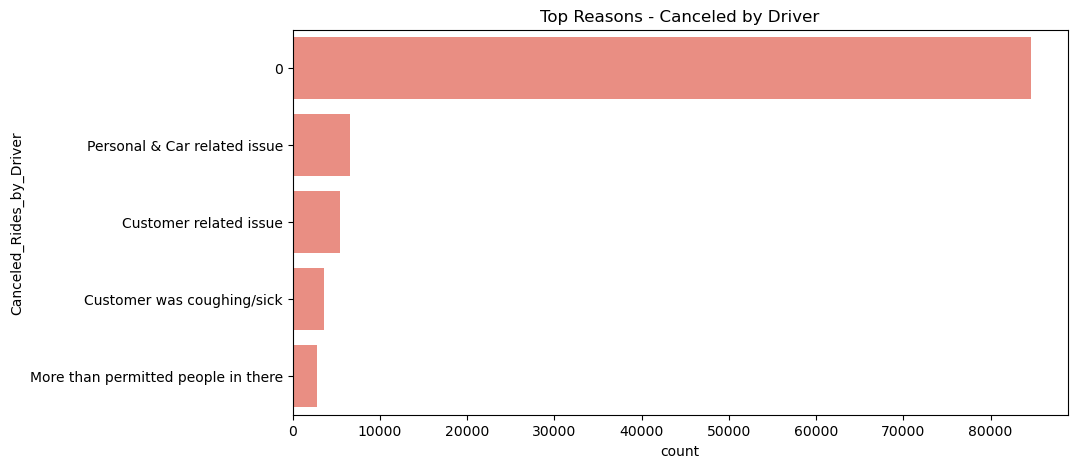

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(
    y=df['Canceled_Rides_by_Customer'],
    order=df['Canceled_Rides_by_Customer'].value_counts().index,
    color="skyblue"   # single color instead of palette
)
plt.title("Top Reasons - Canceled by Customer")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(
    y=df['Canceled_Rides_by_Driver'],
    order=df['Canceled_Rides_by_Driver'].value_counts().index,
    color="salmon"
)
plt.title("Top Reasons - Canceled by Driver")
plt.show()


In the cancellation columns, a value of 0 indicates that no cancellation occurred from that side, meaning the ride was completed successfully. Actual text reasons appear only when the ride was canceled

Incomplete Rides Count:
Incomplete_Rides
0.0    103024
Name: count, dtype: int64

Top Incomplete Ride Reasons:
Incomplete_Rides_Reason
Not Applicable       99098
Customer Demand       1601
Vehicle Breakdown     1591
Other Issue            734
Name: count, dtype: int64


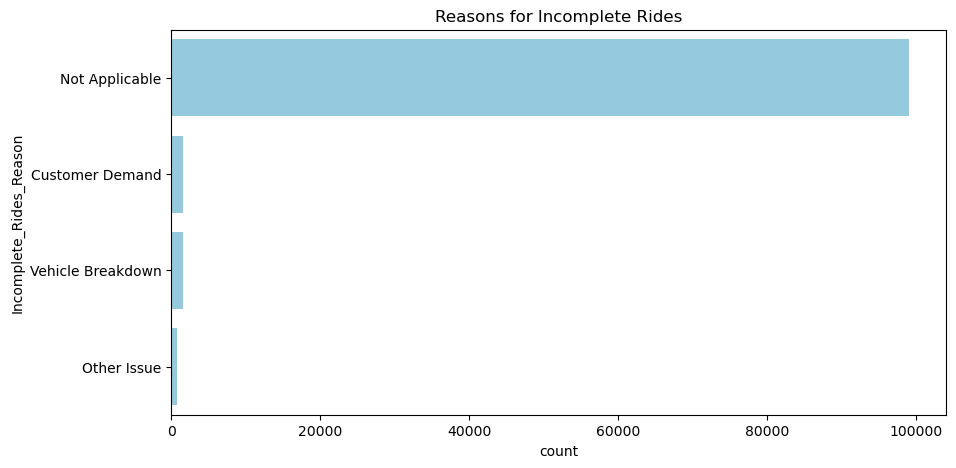

In [47]:
# Incomplete rides count
print("Incomplete Rides Count:")
print(df['Incomplete_Rides'].value_counts())

# Incomplete ride reasons frequency
print("\nTop Incomplete Ride Reasons:")
print(df['Incomplete_Rides_Reason'].value_counts())

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(
    y=df['Incomplete_Rides_Reason'],
    order=df['Incomplete_Rides_Reason'].value_counts().index,
    color="skyblue"
)
plt.title("Reasons for Incomplete Rides")
plt.show()


A large number of records show 'Not Applicable' in Incomplete_Rides_Reason, which corresponds to rides that were successfully completed

# BIVARIATE ANALYSIS

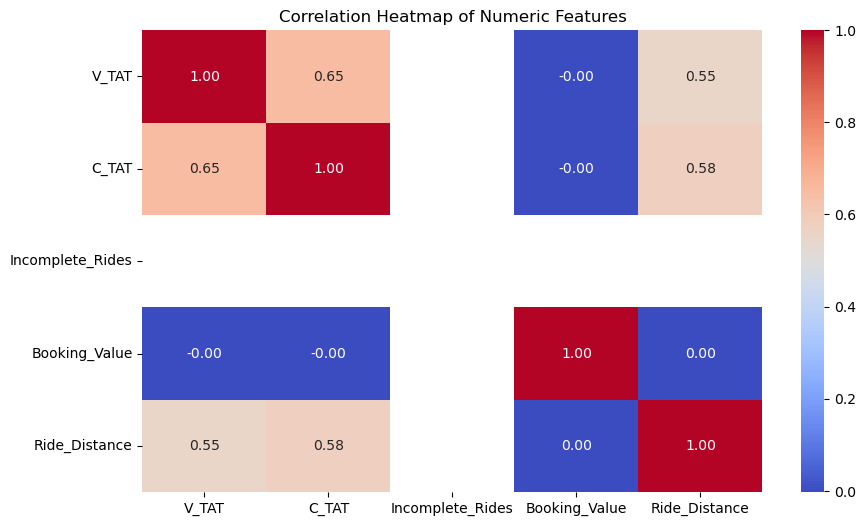

In [56]:

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Correlation matrix
corr_matrix = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


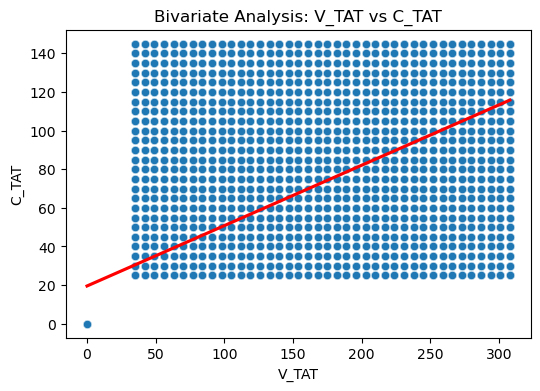

Correlation between V_TAT and C_TAT: 0.65


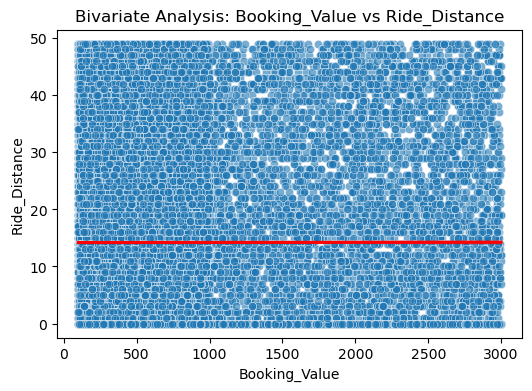

Correlation between Booking_Value and Ride_Distance: 0.00


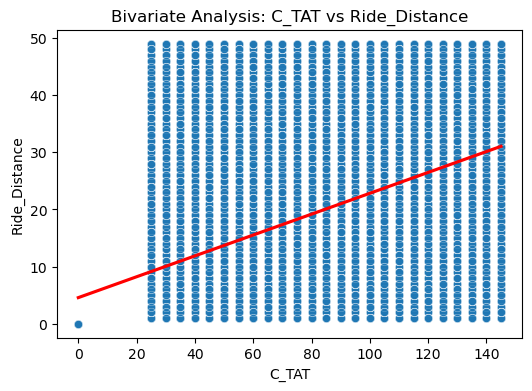

Correlation between C_TAT and Ride_Distance: 0.58


In [48]:


# Highly correlated pairs from your heatmap
pairs = [
    ('V_TAT', 'C_TAT'),
    ('Booking_Value', 'Ride_Distance'),
    ('C_TAT', 'Ride_Distance')
]

for x, y in pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=x, y=y, data=df, alpha=0.6)
    sns.regplot(x=x, y=y, data=df, scatter=False, color='red')  # regression line
    plt.title(f"Bivariate Analysis: {x} vs {y}")
    plt.show()

    # Print correlation value
    corr = df[[x, y]].corr().iloc[0, 1]
    print(f"Correlation between {x} and {y}: {corr:.2f}")


In [50]:


X = df['Ride_Distance']
Y = df['Booking_Value']

# Method 1: Using scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print(f"Slope: {slope:.2f}, Intercept: {intercept:.2f}")
print(f"Correlation (r): {r_value:.2f}")

# Method 2: Manual formula (just for slope)
r = np.corrcoef(X, Y)[0,1]
slope_manual = r * (Y.std() / X.std())
print(f"Slope (manual): {slope_manual:.2f}")


Slope: 0.02, Intercept: 548.51
Correlation (r): 0.00
Slope (manual): 0.02


In [52]:
X = df['V_TAT']
Y = df['C_TAT']

# Method 1: Using scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print(f"Slope: {slope:.2f}, Intercept: {intercept:.2f}")
print(f"Correlation (r): {r_value:.2f}")

# Method 2: Manual formula (just for slope)
r = np.corrcoef(X, Y)[0,1]
slope_manual = r * (Y.std() / X.std())
print(f"Slope (manual): {slope_manual:.2f}")


Slope: 0.31, Intercept: 19.55
Correlation (r): 0.65
Slope (manual): 0.31


# 6. FEATURE ENGINEERING

# EXTRACTING TIME FROM DATE


In [57]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Date"]=df["Date"].dt.date
print(df)

              Date      Time     Booking_ID        Booking_Status Customer_ID  \
0       2024-07-26  14:00:00  CNR7153255142    Canceled by Driver   CID713523   
1       2024-07-25  22:20:00  CNR2940424040               Success   CID225428   
2       2024-07-30  19:59:00  CNR2982357879               Success   CID270156   
3       2024-07-22  03:15:00  CNR2395710036  Canceled by Customer   CID581320   
4       2024-07-02  09:02:00  CNR1797421769               Success   CID939555   
...            ...       ...            ...                   ...         ...   
103019  2024-07-31  09:06:00  CNR9488489435               Success   CID371654   
103020  2024-07-31  15:12:00  CNR3151743100               Success   CID334158   
103021  2024-07-31  13:59:00  CNR1286151233               Success   CID113188   
103022  2024-07-31  14:56:00  CNR2027162035               Success   CID118301   
103023  2024-07-31  13:57:00  CNR9770709721               Success   CID217959   

       Vehicle_Type    Pick

Helps break down booking patterns by exact time, making it easy to spot when customers are most active.

# EXTRACTING MINUTES AND ALSO TELL THE TIME OF THE DAY [MORNING,AFTERNON,EVENING,NIGHT]. 

In [ ]:



df["time"] = pd.to_datetime(df["Time"], format="%H:%M:%S", errors="coerce")

# Extract hour and minute from the new datetime column
df["hour"] = df["time"].dt.hour
df["minute"] = df["time"].dt.minute
df['am_pm'] = df['time'].dt.strftime('%p')   # gives AM or PM


# Categorize into time of day
def time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df["time_of_day"] = df["hour"].apply(time_of_day)

print(df[["Time", "hour", "minute", "time_of_day"]])




Categorizing hours into slots highlights demand peaks, e.g., evenings showing higher ride activity.

# WHICH IS THE PEAK HOUR OF THE DAY ?

In [59]:
df["is_peak_hour"] = df["hour"].apply(lambda x: 1 if (7 <= x <= 10 or 17 <= x <= 20) else 0)
print(df["is_peak_hour"].head())

0    0
1    0
2    1
3    0
4    1
Name: is_peak_hour, dtype: int64


dentifies the busiest hour when maximum bookings occur — useful for resource allocation.

# TOTAL RIDES BASED ON THE DAYS

In [61]:
day_counts = df['Day_of_week'].value_counts()
print(day_counts)

Day_of_week
Tuesday      16926
Monday       16729
Wednesday    16434
Friday       13345
Saturday     13341
Thursday     13236
Sunday       13013
Name: count, dtype: int64


# WHICH DAY HAS THE HIGHEST BOOKING ?

In [62]:
Highest_booking_by_day = (
    df.groupby('Day_of_week')['Booking_ID']
      .count()
      .reset_index(name='Booking_count')
      .sort_values(by='Booking_count', ascending=False)
)
print(Highest_booking_by_day)

  Day_of_week  Booking_count
5     Tuesday          16926
1      Monday          16729
6   Wednesday          16434
0      Friday          13345
2    Saturday          13341
4    Thursday          13236
3      Sunday          13013


Shows which weekday customers prefer traveling the most, helping in demand forecasting.

# RIDES CANCEL BY THE CUSTOMER

In [23]:
Canceled_Rides_by_Customer = df["Canceled_Rides_by_Customer"].count()
print(Canceled_Rides_by_Customer)

10499


Tells us how often customers cancel, revealing gaps in pricing, convenience, or trust.

# RIDES CANCEL BY THE DRIVER

In [57]:
Canceled_Rides_by_Driver = df.groupby("Canceled_Rides_by_Driver")["Booking_ID"].count()
print(Canceled_Rides_by_Driver)

Canceled_Rides_by_Driver
0                                      84590
Customer related issue                  5413
Customer was coughing/sick              3654
More than permitted people in there     2825
Personal & Car related issue            6542
Name: Booking_ID, dtype: int64


Highlights operational inefficiency; high driver cancellations could mean driver shortages or mismatches.


# TOTAL RIDES PER CUSTOMER

In [25]:
total_rides_per_customer= df.groupby("Customer_ID")["Booking_ID"].count().reset_index(name="total_rides_by_customer")
print(total_rides_per_customer)

      Customer_ID  total_rides_by_customer
0       CID100033                        1
1       CID100034                        1
2       CID100043                        1
3       CID100046                        1
4       CID100050                        1
...           ...                      ...
94539   CID999974                        1
94540   CID999981                        1
94541   CID999982                        1
94542   CID999990                        1
94543   CID999996                        2

[94544 rows x 2 columns]


Distinguishes between loyal customers with repeat rides and one-time users

# AVERAGE BOOKING PRICE

In [26]:
avg_booking_value= df["Booking_Value"].mean()
print(avg_booking_value)

548.7518830563752


Gives the typical spending per ride, helping analyze affordability and pricing strategies.

# MOST DEMANDING VEHICLE

In [28]:
most_used_vehicle = (
    df['Vehicle_Type'].value_counts().reset_index()
)
most_used_vehicle.columns = ['Vehicle_Type', 'ride_count']

print(most_used_vehicle)


  Vehicle_Type  ride_count
0  Prime Sedan       14877
1        eBike       14816
2         Auto       14755
3   Prime Plus       14707
4         Bike       14662
5    Prime SUV       14655
6         Mini       14552


Shows customer preference across vehicle categories, e.g., Prime Sedan or e bike being most booked.

# TOTAL RIDES PER HOUR

In [29]:
total_rides_per_hour= df.groupby(["hour","is_peak_hour"])["Booking_ID"].count().sort_values(ascending=False).reset_index(name="total_rides_per_hour")
print(total_rides_per_hour)

    hour  is_peak_hour  total_rides_per_hour
0     12             0                  4408
1     15             0                  4376
2      8             1                  4374
3     17             1                  4353
4      9             1                  4347
5     21             0                  4343
6     10             1                  4334
7      1             0                  4329
8      0             0                  4318
9      2             0                  4305
10     7             1                  4304
11    13             0                  4285
12    22             0                  4283
13    11             0                  4272
14     6             0                  4271
15    19             1                  4271
16     5             0                  4264
17     4             0                  4263
18    16             0                  4261
19    14             0                  4232
20    20             1                  4228
21    23  

Tracks how demand fluctuates across the day, useful for shift planning and surge pricing.

# COMPLETE RIDES PER HOUR

In [30]:
completed_rides_per_hour = (
    df[df['Booking_Status'] == 'Success']
    .groupby(["hour", "is_peak_hour"])["Booking_ID"]
    .count()
    .reset_index(name="completed_rides_per_hour")
    .sort_values(by="completed_rides_per_hour", ascending=False)
)

print(completed_rides_per_hour)

    hour  is_peak_hour  completed_rides_per_hour
15    15             0                      2758
0      0             0                      2726
11    11             0                      2716
5      5             0                      2710
12    12             0                      2699
1      1             0                      2697
17    17             1                      2691
8      8             1                      2681
9      9             1                      2680
13    13             0                      2680
21    21             0                      2679
3      3             0                      2668
14    14             0                      2666
2      2             0                      2658
23    23             0                      2657
6      6             0                      2655
4      4             0                      2651
19    19             1                      2646
16    16             0                      2629
7      7            

Focuses only on successful rides, filtering out cancellations to show real demand.

# AVERAGE RIDES PER HOUR

In [31]:



avg_rides_per_hour = completed_rides_per_hour.mean()

print(avg_rides_per_hour)

hour                          11.500000
is_peak_hour                   0.333333
completed_rides_per_hour    2665.291667
dtype: float64


Provides a normalized view of ride activity, balancing peak and off-peak times.

# AVERAGE BOOKING PER DAY

In [32]:
average_booking_per_day = df.groupby('Day_of_week')['Booking_ID'].count().mean()
print("Average bookings per day:", average_booking_per_day)


Average bookings per day: 14717.714285714286


Summarizes daily demand, showing how the business performs on an average day.

# WHICH AREA HAS THE HIGHEST BOOKING ?

In [34]:
area_have_high_booking = df.groupby("Pickup_Location")["Booking_ID"].count().sort_values(ascending=False)
print(area_have_high_booking)

Pickup_Location
Banashankari            2201
Yeshwanthpur            2139
RT Nagar                2135
Indiranagar             2133
Sahakar Nagar           2126
Basavanagudi            2120
Ramamurthy Nagar        2116
Vijayanagar             2113
Tumkur Road             2105
Cox Town                2100
Magadi Road             2099
BTM Layout              2091
Hennur                  2090
Whitefield              2087
Mysore Road             2085
Nagarbhavi              2083
Kengeri                 2083
Langford Town           2079
Hosur Road              2074
Kammanahalli            2071
Sarjapur Road           2070
Peenya                  2069
Majestic                2067
Koramangala             2062
Malleshwaram            2058
Hebbal                  2058
KR Puram                2058
MG Road                 2048
Frazer Town             2048
Bannerghatta Road       2046
Yelahanka               2044
Electronic City         2044
Richmond Town           2042
HSR Layout              204

# TOTAL REVENUE BY DIVIDES BY PAYMENT METHOD [ CASH, UPI, CREDIT CARD]

In [35]:
total_revenue_by_Cash = (df[df["Payment_Method"]== "Cash"]
                 .groupby("Payment_Method")["Booking_Value"].sum()
                       
                )

total_revenue_by_UPI= (df[df["Payment_Method"]== "UPI"]
                 .groupby("Payment_Method")["Booking_Value"].sum()
                     
                )


total_revenue_by_Credit_Card = (df[df["Payment_Method"]== "Credit Card"]
                 .groupby("Payment_Method")["Booking_Value"].sum()
                            
                )




print(total_revenue_by_Credit_Card)

print(total_revenue_by_Cash)

print(total_revenue_by_UPI)

                 

Payment_Method
Credit Card    1312793
Name: Booking_Value, dtype: int64
Payment_Method
Cash    19260316
Name: Booking_Value, dtype: int64
Payment_Method
UPI    14168436
Name: Booking_Value, dtype: int64


Shows which payment channels bring maximum revenue, helping in digital adoption strategies.

# AVERAGE RATING BY CUSTOMER

In [36]:
avg_customer_rating = df["Customer_Rating"].mean()

rounded_mean=round(avg_customer_rating,2)
                  

print(rounded_mean)

4.0


Captures service quality feedback from customers’ side.

# AVERAGE RATING BY THE DRIVER

In [37]:
avg_driver_rating = df["Driver_Ratings"].mean()

rounded_mean=round(avg_driver_rating,2)
                  

print(rounded_mean)

4.0


Measures customer satisfaction from the driver’s perspective.

# TOTAL DISTANCE COVER BY THE EACH VEHICLE

In [38]:
distnace_cover_by_vehicle = df.groupby("Vehicle_Type")["Ride_Distance"].sum().sort_values(ascending=False)
print(distnace_cover_by_vehicle)


Vehicle_Type
Prime Sedan    234535
eBike          230842
Bike           227746
Prime Plus     227186
Mini           225703
Prime SUV      223848
Auto            92043
Name: Ride_Distance, dtype: int64


Reveals which vehicle type contributes most to kilometers traveled — good for fleet utilization studies.

# Descriptive Analysis → “What happened?”

The dataset consists of 103k ride bookings across ~94k unique customers. Around 62% rides were successful, while ~38% were incomplete (driver cancelations, customer cancelations, or no driver found). Rides are fairly evenly distributed across all vehicle types, with strong demand in urban hubs (Banashankari, Yeshwanthpur, Indiranagar, Peenya, MG Road, etc.).
Most rides are short-to-medium distance (median 8 km) with an average booking value of ~₹550. Customers prefer Cash (34%) and UPI (25%), while credit/debit cards are rarely used. Vendor turnaround time is much longer (avg 106 mins) compared to customer turnaround time (52 mins), which could be a factor behind cancellations.

# Diagnostic Analysis → “Why did it happen?”

Around 38% of rides were incomplete, mainly due to driver-related issues (6.5k), customer-related problems (5.4k), and health or overcapacity concerns (6k combined). A key driver is the Vendor TAT (106 mins), which is much longer than Customer TAT (52 mins), making cancellations more likely. Peak-hour demand in busy hubs (MG Road, Indiranagar, Yeshwanthpur) also contributes to mismatches between supply and demand.

# Predictive → What will happen?

The dataset trends suggest that future cancellations can be predicted using ride features. Rides with high Vendor TAT, those requested during peak hours, or involving longer distances with higher booking values are more likely to get canceled. In contrast, short-distance rides and bookings paid through Cash or UPI show a higher chance of completion. Since most rides are short-to-medium distance, we can expect this pattern to continue, with urban hubs like MG Road, Yeshwanthpur, and Indiranagar remaining demand hotspots.

# Prescriptive Analysis  → What should be done?

To reduce cancellations, the platform should focus on optimizing Vendor TAT by allocating drivers more efficiently during peak hours. Encouraging digital adoption beyond cash and UPI can streamline payments and reduce transaction delays. Educating customers about vehicle capacity rules and strengthening driver reliability (regular vehicle checks, better incentives) will also improve success rates. Expanding driver supply in high-demand urban hubs can further balance demand and supply, ensuring smoother operations.